# Second Exploratory Notebook

## Used for Data Exploration of Full Listings Data

In [1]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import string, re
import urllib
import seaborn as sbn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('../../Data/2019/listings122019long.csv')

In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20191219173821,2019-12-20,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, Dutch Colonial ...",none,Madrona is a hidden gem of a neighborhood. It ...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.23
1,5682,https://www.airbnb.com/rooms/5682,20191219173821,2019-12-20,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.89
2,6606,https://www.airbnb.com/rooms/6606,20191219173821,2019-12-19,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.18
3,9419,https://www.airbnb.com/rooms/9419,20191219173821,2019-12-20,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,7,0,7,0,1.29
4,9460,https://www.airbnb.com/rooms/9460,20191219173821,2019-12-20,Downtown Convention Center B&B -- Free Minibar,Take up a glass of wine and unwind on one of t...,Greetings from Seattle. Thanks for considering...,Take up a glass of wine and unwind on one of t...,none,"This is where Downtown meets Capitol Hill, wit...",...,t,f,moderate,f,f,4,3,1,0,3.64


In [4]:
data1 = data.drop(columns=['listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered',
                           'neighborhood_overview','notes','transit','access','interaction','house_rules',
                           'thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url',
                           'host_name','host_since', 'host_location','host_about','host_response_time','host_response_rate',
                           'host_acceptance_rate', 'host_thumbnail_url','host_picture_url', 'host_neighbourhood',
                           'host_listings_count','host_total_listings_count', 'host_verifications','host_has_profile_pic',
                           'host_identity_verified','street', 'city','state','zipcode','market','country_code',
                           'country', 'is_location_exact','bed_type','amenities','square_feet','weekly_price',
                           'monthly_price','security_deposit','guests_included','extra_people','maximum_nights',
                           'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                           'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                           'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped','first_review',
                           'last_review','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                           'review_scores_communication', 'review_scores_location','requires_license', 'license',
                           'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
                           'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count',
                           'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                           'calculated_host_listings_count_shared_rooms', 'neighbourhood','smart_location','id','property_type'
                          ])

In [5]:
data1.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_value,reviews_per_month
count,7968.000000,7968.000000,7968.000000,7967.000000,7961.000000,7964.000000,7968.000000,7968.000000,7968.000000,6809.000000,6809.000000,6858.000000
mean,47.624916,-122.333363,3.662525,1.315175,1.386760,1.912356,14.024096,52.698419,18.046812,95.062417,9.504186,2.309240
std,0.045517,0.031535,2.317617,0.660248,1.001517,1.601943,18.687884,78.504025,24.284183,7.336431,0.793086,2.200196
min,47.495870,-122.419250,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000,0.000000
25%,47.605520,-122.353032,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,0.000000,94.000000,9.000000,0.490000
50%,47.619690,-122.332675,3.000000,1.000000,1.000000,1.000000,3.000000,19.000000,7.000000,97.000000,10.000000,1.650000
75%,47.658973,-122.311880,4.000000,1.500000,2.000000,2.000000,30.000000,70.000000,28.000000,99.000000,10.000000,3.570000
max,47.735930,-122.236720,28.000000,16.000000,8.000000,49.000000,400.000000,800.000000,217.000000,100.000000,10.000000,15.880000


In [6]:
data1.columns

Index(['name', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'cleaning_fee', 'minimum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month'],
      dtype='object')

In [7]:
data1.head()

,name,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_value,reviews_per_month
0,Casa Madrona - Urban Oasis 1 block from the park!,t,Madrona,Central Area,47.61082,-122.29082,Entire home/apt,9,2.5,4.0,4.0,$296.00,$250.00,7,31,10,100.0,10.0,0.23
1,"Cozy Studio, min. to downtown -WiFi",f,South Delridge,Delridge,47.52398,-122.35989,Entire home/apt,2,1.0,0.0,1.0,$48.00,$45.00,3,462,0,95.0,10.0,3.89
2,"Fab, private seattle urban cottage!",f,Wallingford,Other neighborhoods,47.65411,-122.33761,Entire home/apt,2,1.0,1.0,1.0,$90.00,$40.00,30,150,16,92.0,9.0,1.18
3,Glorious sun room w/ memory foambed,t,Georgetown,Other neighborhoods,47.55062,-122.32014,Private room,2,3.0,1.0,1.0,$62.00,$0.00,2,147,17,93.0,10.0,1.29
4,Downtown Convention Center B&B -- Free Minibar,t,First Hill,Downtown,47.61265,-122.32936,Private room,2,1.0,1.0,1.0,$79.00,$45.00,3,457,54,98.0,10.0,3.64


# Change Price to Numerical and Get rid of NaNs in data

In [8]:
data1['price'] = data1['price'].str.extract('(\d+)', expand=False).astype('float')

In [9]:
data1['cleaning_fee'] = data1['cleaning_fee'].str.extract('(\d+)', expand=False).astype('float')

In [10]:
data1['host_is_superhost'] = (data1['host_is_superhost'] == 't').astype('int')

In [11]:
data1['reviews_per_month'] = data1['reviews_per_month'].fillna(0)
data1['bathrooms'] = data1['bathrooms'].fillna(data1['bathrooms'].mean())
data1['bedrooms'] = data1['bedrooms'].fillna(data1['bedrooms'].mean())
data1['beds'] = data1['beds'].fillna(data1['beds'].mean())
data1['cleaning_fee'] = data1['cleaning_fee'].fillna(data1['cleaning_fee'].mean())
data1['review_scores_rating'] = data1['review_scores_rating'].fillna(0)

In [12]:
data1['longitude'] = data1['longitude'].round(decimals=4)
data1['latitude'] = data1['latitude'].round(decimals=4)

In [13]:
data1 = data1[data1.minimum_nights<31]

# Vectorize Categorical Variables

In [14]:
ohe_ng = OneHotEncoder(sparse=False)
ohe_n = OneHotEncoder(sparse=False)
ohe_r = OneHotEncoder(sparse=False)
ohe_mn = OneHotEncoder(sparse=False)
neigh_group = ohe_ng.fit_transform(data1[['neighbourhood_group_cleansed']])
neigh_group_cat = ohe_ng.categories_
neigh = ohe_n.fit_transform(data1[['neighbourhood_cleansed']])
neigh_cat = ohe_n.categories_
room = ohe_r.fit_transform(data1[['room_type']])
room_cat = ohe_r.categories_
# prop = ohe.fit_transform(data1[['room_type']])
# prop_cat = ohe.categories_
minimum = ohe_mn.fit_transform(data1[['minimum_nights']])
minimum_cat = ohe_mn.categories_

/opt/anaconda3/envs/bnb_env/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [15]:
list(neigh_group_cat)

[array(['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade',
        'Central Area', 'Delridge', 'Downtown', 'Interbay', 'Lake City',
        'Magnolia', 'Northgate', 'Other neighborhoods', 'Queen Anne',
        'Rainier Valley', 'Seward Park', 'University District',
        'West Seattle'], dtype=object)]

In [16]:
# ohe_ng.transform([['Northgate']])
len(list(neigh_cat[0]))
# np.array([['Ballard']])

89

In [17]:
# import pickle
# pickle.dump(ohe_ng, open('ohe_ng.sav', 'wb'))
# pickle.dump(ohe_n, open('ohe_n.sav', 'wb'))
# pickle.dump(ohe_r, open('ohe_r.sav', 'wb'))
# pickle.dump(ohe_mn, open('ohe_mn.sav', 'wb'))

In [18]:
minimum_cat = minimum_cat[0].astype('str')

In [19]:
minimum_cat = list(minimum_cat)

In [20]:
new_minimum_cat = [(lambda x : f'minimum_nights: {x}')(x) for x in range(len(minimum_cat))]

In [21]:
def rename(name_of_columns,pre_addition):
    new_list = []
    for x in name_of_columns:
        for x in x:
            new_list.append(pre_addition+ '' + x)
    return new_list

In [22]:
new_neigh_group_cat = rename(neigh_group_cat,'neighbourhood_group: ')
new_neigh_cat = rename(neigh_cat,'neighbourhood: ')
new_room_cat = rename(room_cat,'room_type: ')
# new_prop_cat = rename(prop_cat, 'property_type: ')

In [23]:
# Create categories for neighborhood_group, neighborhood and room_type
neigh_group_df = pd.DataFrame(data=neigh_group,columns=new_neigh_group_cat)
neigh_df = pd.DataFrame(data=neigh,columns=new_neigh_cat)
room_type_df = pd.DataFrame(data=room,columns = new_room_cat)
# property_df = pd.DataFrame(data=prop, columns= new_prop_cat)
minimum_df = pd.DataFrame(data=minimum,columns=new_minimum_cat)

# NLP for Name Category

In [24]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
vectorizer = TfidfVectorizer(strip_accents='unicode',stop_words=stopwords_list,min_df=60,max_df = 800, ngram_range=(1,3))
# get rid of na in name column
data1.fillna({'name':''}, inplace=True)
tf_idf = vectorizer.fit_transform(data['name'])
nlp_name = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names())

In [68]:
nlp_name[13:16]

,10,100,100 walkscore,1bd,1br,2bd,2br,airport,alfred,alfred pike,...,view,views,walk,walkscore,wallingford,washington,water,waterfront,west,west seattle
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.618141,0.625877
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.621894,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [25]:
# import pickle
# pickle.dump(tf_idf, open('nlp.sav', 'wb'))

# Reconnect DataFrames / Drop Duplicates

In [26]:
clean_data = pd.concat([data1,neigh_group_df,neigh_df,room_type_df,nlp_name,minimum_df],axis=1)

In [27]:
clean_data = clean_data.drop(columns=['name','neighbourhood_cleansed','minimum_nights',
                                      'neighbourhood_group_cleansed','room_type'])

# Remove New/ Unsuccessful Properties

In [28]:
clean_data.describe()

,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,...,minimum_nights: 9,minimum_nights: 10,minimum_nights: 11,minimum_nights: 12,minimum_nights: 13,minimum_nights: 14,minimum_nights: 15,minimum_nights: 16,minimum_nights: 17,minimum_nights: 18
count,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,...,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000
mean,0.435394,47.624743,-122.333367,3.668736,1.314583,1.385777,1.912685,157.311376,83.714270,53.036990,...,0.002154,0.001393,0.000127,0.000127,0.000760,0.000760,0.000127,0.001140,0.000380,0.397770
std,0.495840,0.045522,0.031519,2.321186,0.660163,1.000765,1.605642,153.093786,71.316643,78.742434,...,0.046359,0.037305,0.011255,0.011255,0.027561,0.027561,0.011255,0.033748,0.019492,0.489469
min,0.000000,47.495900,-122.419200,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,47.605400,-122.353000,2.000000,1.000000,1.000000,1.000000,79.000000,40.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,47.619500,-122.332700,3.000000,1.000000,1.000000,1.000000,115.000000,72.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,47.658800,-122.311900,4.000000,1.500000,2.000000,2.000000,180.000000,100.000000,71.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,47.735900,-122.236700,28.000000,16.000000,8.000000,49.000000,999.000000,700.000000,800.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
clean_data = clean_data[clean_data.review_scores_rating>60]

In [30]:
clean_data = clean_data[clean_data.price>20]
clean_data = clean_data[clean_data.price<800]
clean_data = clean_data.dropna()

# Visualize Data

In [31]:
import seaborn as sbn
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

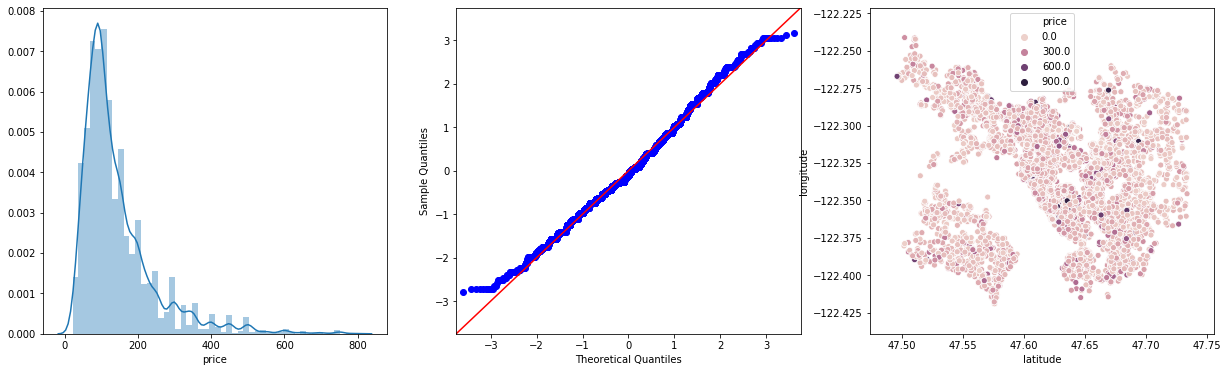

In [32]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sbn.distplot((clean_data['price']), ax=axes[0])
axes[0].set_xlabel('price')
sm.qqplot(np.log1p(clean_data['price']), stats.norm, fit=True, line='45', ax=axes[1])
sbn.scatterplot(x= clean_data['latitude'], y=clean_data['longitude'],hue=clean_data['price'],ax=axes[2]);

AxesSubplot(0.125,0.125;0.62x0.755)


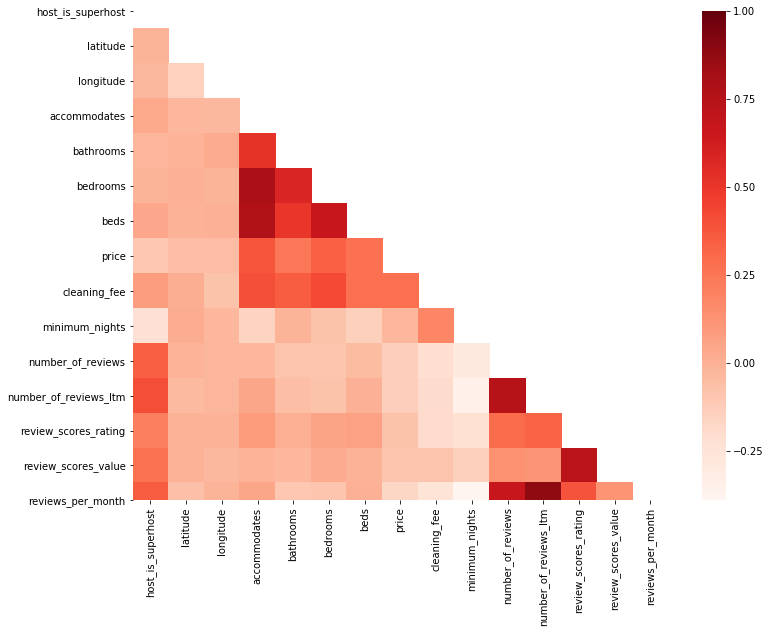

In [37]:
correlations = data1.corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap_one = sbn.heatmap(correlations, cmap ='Reds', mask = mask)
print(heatmap_one)

# fig = heatmap_one.get_figure()
# fig.savefig("heatmap.png")

# Train Test Split

In [ ]:
ss = StandardScaler()
X = clean_data.drop(columns=['price','number_of_reviews_ltm','review_scores_rating',
                             'review_scores_value','reviews_per_month'])
Xss = ss.fit_transform(X)
y = clean_data['price']
Xtrain,Xtest,ytrain,ytest = train_test_split(Xss,y,test_size = .05,random_state=11)

In [ ]:
X.columns

# Random Forest

In [ ]:
rfr = RandomForestRegressor(n_estimators=1000,min_samples_split=5,min_samples_leaf=3,random_state=11)
rfr.fit(Xtrain,ytrain)
rfr.score(Xtrain,ytrain)

In [ ]:
yprebootstrapdtrain = rfr.predict(Xtrain)
ypredtest = rfr.predict(Xtest)

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error,mean_squared_error
print(r2_score(ytrain,ypredtrain))
print(r2_score(ytest,ypredtest))

In [ ]:

# import pickle
# pickle.dump(rfr, open('rf.sav', 'wb'))

In [ ]:
sorted(list(zip(rfr.feature_importances_,X.columns)),reverse=True)[0:15]

In [ ]:
list(zip(ytest,ypredtest))[0:10]

In [ ]:
abs(sum(ytest)-sum(ypredtest))/len(ytest)

In [ ]:
y

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfr.estimators_[0],
               feature_names = X.columns, 
               filled = True);
fig.savefig('rf_individualtree.png')


# Neural Net

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

In [ ]:
model = Sequential()
model.add(Dense(len(X.columns), input_dim=len(X.columns), kernel_initializer='normal', activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
history = model.fit(Xtrain, ytrain, epochs=100, batch_size=3,  verbose=1, validation_split=0.2)

In [ ]:
nnpreds = []
for x in model.predict(Xtest):
    for x in x:
        nnpreds.append(x)

In [ ]:
abs(sum(ytest)-sum(nnpreds))/len(ytest)

In [ ]:
print(explained_variance_score(ytest,ypredtest))
# print(explained_variance_score(ytest,nnpreds))

In [ ]:
print(mean_absolute_error(ytest,ypredtest))
# print(mean_absolute_error(ytest,nnpreds))

In [ ]:
print(r2_score(ytest,ypredtest))
print(r2_score(ytest,nnpreds))

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sbn.distplot(list(abs(ytest-ypredtest)/ytest), ax=axes[0])
axes[0].set_xlabel('percentage difference')
sm.qqplot(np.log1p(clean_data['price']), stats.norm, fit=True, line='45', ax=axes[1])
sbn.scatterplot(x= clean_data['latitude'], y=clean_data['longitude'],hue=clean_data['price'],ax=axes[2]);

In [ ]:
len(ytest)

In [ ]:
list(abs(ytest-ypredtest)/ytest)

In [ ]:
sum(abs(ytest-nnpreds)/ytest)/len(ytest)

In [ ]:
list(zip(abs(ytest-nnpreds),abs(ytest-ypredtest)))

In [ ]:
list(zip(nnpreds,ytest,ypredtest))

In [ ]:
list(data1.columns)

In [ ]:
list(X.columns)